In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings

In [ ]:
warnings.filterwarnings("ignore")
file_path=r"C:\Users\GIRIHARAN\Downloads\Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250527.csv"
df=pd.read_csv(file_path)

In [12]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True, errors='coerce')
df=df.dropna(subset=['Date']).sort_values('Date').reset_index(drop=True)
df=df.set_index('Date')

In [ ]:
def remove_outliers_iqr(series):
    o1=series.quantile(0.25)
    o2=series.quantile(0.75)
    IQR=o2-o1
    lower=o1-1.5*IQR
    upper=o2+1.5*IQR
    return series.clip(lower=lower,upper=upper)

In [ ]:

target_columns=['Local Route','Light Rail','Peak Service','Rapid Route','School']
for col in target_columns:
    df[col]=remove_outliers_iqr(df[col])


In [15]:
def forecast_arima(series,column_name,steps=7,show_plot=True):
    model=ARIMA(series, order=(1,1,1))
    model_fit=model.fit()
    forecast=model_fit.forecast(steps=steps)
    future_dates=pd.date_range(start=series.index[-1]+pd.Timedelta(days=1),periods=steps)
    forecast.index=future_dates
    if show_plot:
        plt.figure(figsize=(10,4))
        plt.plot(series[-60:],label="Historical (last 60 days)")
        plt.plot(forecast,label="Forecast",marker='o')
        plt.title(f"{column_name} Forecast-Next 7 Days")
        plt.xlabel("Date")
        plt.ylabel("Passenger Count")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        
        return forecast 

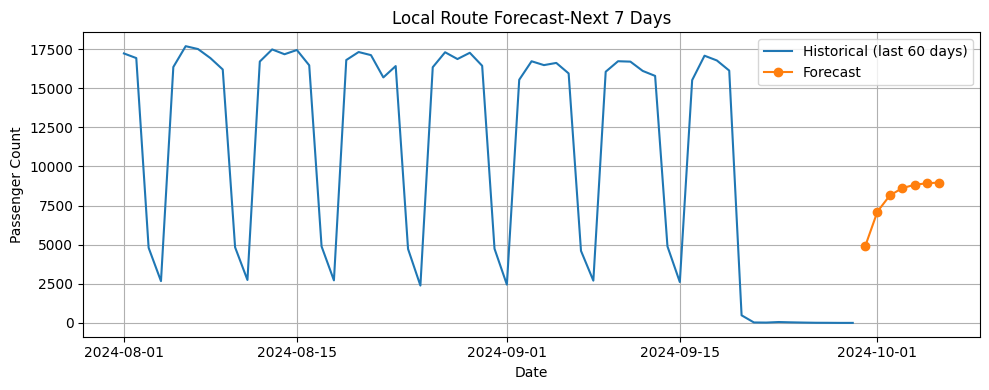

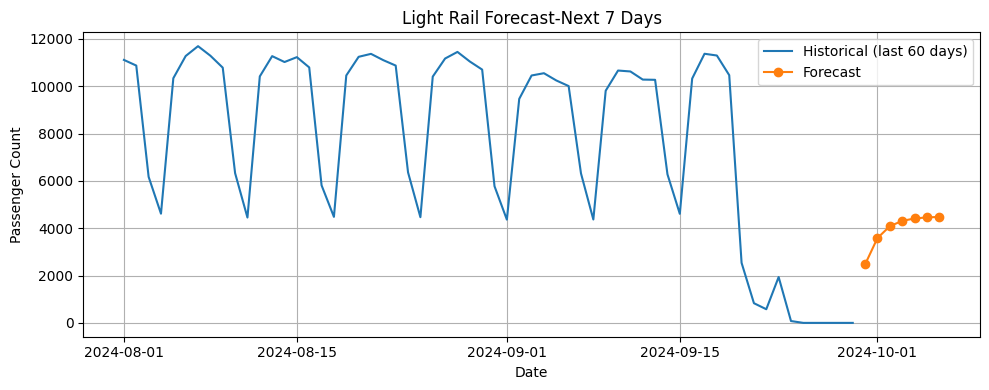

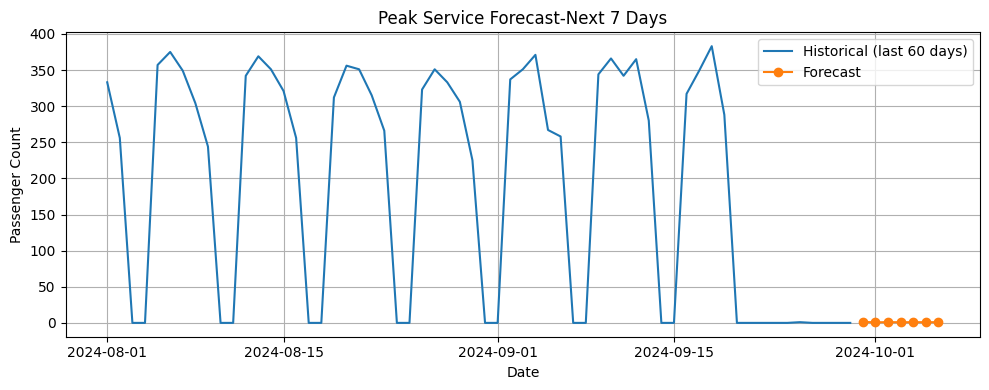

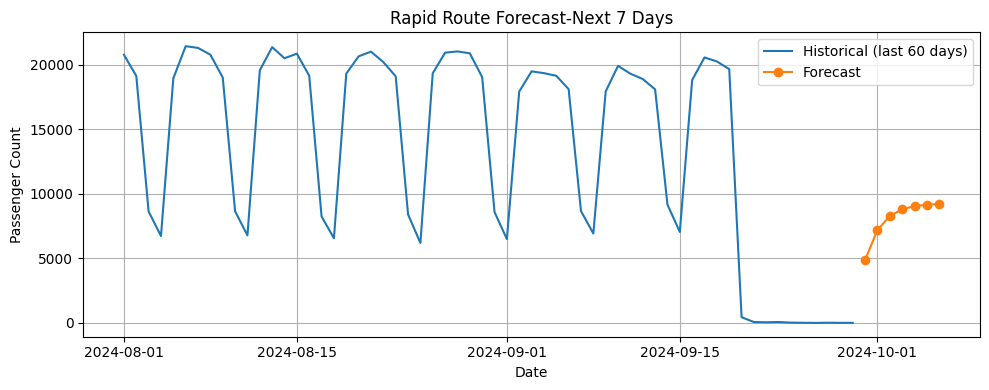

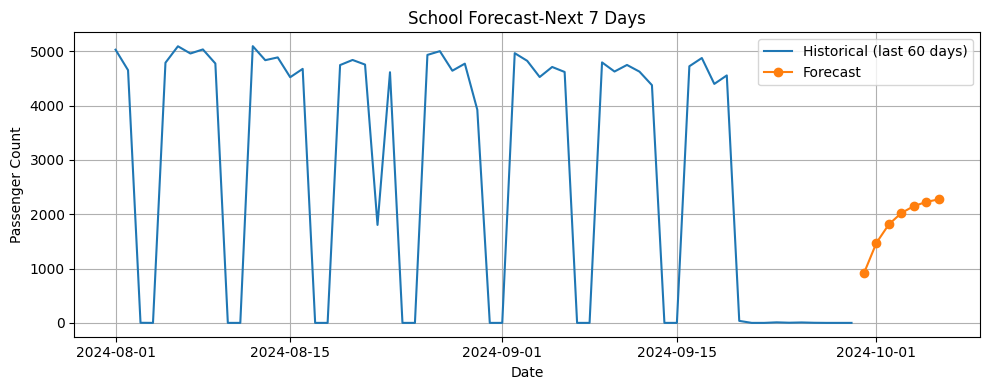

{'Local Route': 2024-09-30    4884.346996
2024-10-01    7120.645249
2024-10-02    8144.744065
2024-10-03    8613.723721
2024-10-04    8828.490025
2024-10-05    8926.840913
2024-10-06    8971.880087
Freq: D, Name: predicted_mean, dtype: float64, 'Light Rail': 2024-09-30    2472.728731
2024-10-01    3585.285193
2024-10-02    4085.858452
2024-10-03    4311.081707
2024-10-04    4412.416554
2024-10-05    4458.010208
2024-10-06    4478.524191
Freq: D, Name: predicted_mean, dtype: float64, 'Peak Service': 2024-09-30    1.413461
2024-10-01    0.746702
2024-10-02    1.061226
2024-10-03    0.912859
2024-10-04    0.982847
2024-10-05    0.949832
2024-10-06    0.965406
Freq: D, Name: predicted_mean, dtype: float64, 'Rapid Route': 2024-09-30    4881.739168
2024-10-01    7187.972614
2024-10-02    8278.154426
2024-10-03    8793.495310
2024-10-04    9037.102591
2024-10-05    9152.258421
2024-10-06    9206.693843
Freq: D, Name: predicted_mean, dtype: float64, 'School': 2024-09-30     916.482875
2024-10-

In [16]:
results = {}
for col in target_columns:
    forecast=forecast_arima(df[col], column_name=col)
    results[col]=forecast
print(results)



In [ ]:

forecast_df=pd.DataFrame(results)
print(forecast_df)

            Local Route   Light Rail  Peak Service  Rapid Route       School
2024-09-30  4884.346996  2472.728731      1.413461  4881.739168   916.482875
2024-10-01  7120.645249  3585.285193      0.746702  7187.972614  1475.402718
2024-10-02  8144.744065  4085.858452      1.061226  8278.154426  1816.261669
2024-10-03  8613.723721  4311.081707      0.912859  8793.495310  2024.135527
2024-10-04  8828.490025  4412.416554      0.982847  9037.102591  2150.908026
2024-10-05  8926.840913  4458.010208      0.949832  9152.258421  2228.220617
2024-10-06  8971.880087  4478.524191      0.965406  9206.693843  2275.369933
